In [2]:
#data analysis
import pandas as pd
import numpy as np

#viz
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import AnchoredText
import seaborn as sns

<h2>
    <div class="alert alert-info" role="info">
StackOverFlow 2021 developer survey EDA
</div>
</h2>

<h3>
    Questions
</h3>

<div class="alert alert-success" role="alert">
 
<p>
    
    
<h4>Country
</h4>
<li>Do some EDA for <b>SEA or SA nations.</b></li>
    
<h4>Country + Age
</h4>
<li>ဘယ်နိုင်ငံက<b>အသက်ငယ်တဲ့လူတွ</b>အများဆုံးလဲ?</li>
    
<h4>Country + CompTotsl
</h4>
<li><b>Age group</b> အလိုက် ရတဲ့ဝင်ငွေ</li> 
   
<h4>Country + Age
</h4>
<li> <b>Age</b> အလိုက်Mainbranch.</li>
    
<h4>Country + Mainbranch
</h4>
<li> နိုင်ငံအလိုက် <b>Mainbranch.</b></li>
    
<h4>Age + DevType
</h4>
<li> အသက်ငယ်/ကြီး တဲ့လူတွေ ဘာအလုပ်အကိုင်တွေလုပ်/ ဘာတွေစိတ်ဝင်စားကြလဲ? </li>
    
<h4>Mainbranch + EdLevel
</h4>
<li>Do <b>pro coders</b> have <b>higher edlevel?</b></li>
    
<h4>DevType 
</h4>
<li>How many <b>Developer types </b>are there in respondent? , <b>how many</b> in each?  and which devtype is the <b>most popular</b>?</li>
  
<h4>DevType + MainBranch
</h4>
<li>Do <b>Data scientists </b> code <b>a lot?</b>and <b>what type of developer</b> do <b>least coding?</b></li>

<h4>LearnCode
</h4>
<li><b>How pro coders learn coding?</b></li>

<h4>LearnCode + Age
</h4>
<li><b>How people in different age group</b> learn coding?</li>
    
<h4>LeanguageHaveWorkedWith 
</h4>
<li><b>what programming languages </b>people and pro coders  work with ?</li>
    
<h4>LeanguageHaveWorkedWith 
</h4>
<li><b>love </b> and <b>dreaded</b> </li>
    
 <h4>LeanguageHaveWorkedWith 
</h4>
<li><b>what programming languages </b>data scientists  work with ?</li>
    
<h4>LanguageHaveWorkedWith </h4>
<li>Which os <b>data scientists use</b>?</li>
    
<h4>Employment 
</h4>
<li>Employment  by <b>Country, Age group, EdLevel.</b></li>
   
 <h4>Os 
</h4>
<li>Which devlopers <b>use which OS</b>?</li>
    
 <h4>Os 
</h4>
<li>Which age group <b>use which OS most</b>?</li>
   
    
</p>
    
</div>
_____________________________________________________________________________________________________

In [3]:
df_main = pd.read_csv('./data/survey_results_public.csv')
df_schema = pd.read_csv('./data/survey_results_schema.csv')

In [4]:
df_main = pd.read_csv('C:\\Users\\TCL\\Desktop\\data_science\\csv\\survey_results_public.csv')
df_schema = pd.read_csv('C:\\Users\\TCL\\Desktop\\data_science\\csv\\survey_results_schema.csv')

#df_schema.set_index('qid', inplace = True)
#df_schema.drop(['S0', 'S1','S2', 'S3', 'S4', 'S5', 'S6'], inplace = True)
df_schema.reset_index(drop = True)
df_schema = df_schema[['qname', 'question']]

# 1.0 Checking the files 

####          1.1 Checking survey questions

In [3]:
pd.options.display.max_colwidth = 380

In [5]:
dc = df_main.columns.to_list()
ds = df_schema.qname.to_list()

check = [c for c in dc if c not in ds]
check

['ResponseId',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'ConvertedCompYearly']

In [6]:
tf = [True if col in ds else False for col in dc]
tfd = pd.DataFrame(tf).rename(columns = {0: 'cols'})
tfd['index'] = tfd.index

dc_s = pd.Series(dc)
ds_s = pd.Series(tf)

pd.set_option('display.max_rows', None)
d = pd.DataFrame(dc_s).rename(columns = {0: 'cols'})
d['index'] = d.index


df_check = d.merge(tfd, on = 'index', how = 'left').rename(columns = {'cols_x': 'df', 'cols_y': 'ds'}).drop('index', axis = 1)
df_check

,df,ds
0,ResponseId,False
1,MainBranch,True
2,Employment,True
3,Country,True
4,US_State,True
5,UK_Country,True
6,EdLevel,True
7,Age1stCode,True
8,LearnCode,True
9,YearsCode,True


# Let's clean & transform some of our data

In [32]:
# the strings are too long
df_main['MainBranch'] = df_main['MainBranch'].replace({'I am a developer by profession' : 'professional',
                                                          'I am a student who is learning to code' : 'learner',
                                                          'I am not primarily a developer, but I write code sometimes as part of my work' : 'sometimes',
                                                          'I code primarily as a hobby' : 'hobbyist',
                                                          'I used to be a developer by profession, but no longer am' : 'ex-pro',
                                                          'None of these' : 'no code'})

# Too many gender types! we might need to divide into only three groups for now "Man, Woman or Other"
df_main['Gender'] = np.where(
     (df_main['Gender'] == 'Man') | (df_main['Gender'] == 'Woman'), 
      df_main['Gender'], 'Other' )

# Age column doesn't need "years old"
df_main['Age'] = df_main['Age'].replace({'25-34 years old': '25-34',
                                        '18-24 years old' : '18-24',
                                        '35-44 years old':'35-44',
                                        '45-54 years old': '45-54',
                                        'Under 18 years old': 'Under 18',
                                        '55-64 years old': '55-64',
                                        'Prefer not to say' : 'Not say',
                                        '65 years or older' : 'Senior'})
#too long
df_main['Employment'] = df_main['Employment'].replace({ 'Independent contractor, freelancer, or self-employed' :  'freelancer',
                                            'Not employed, but looking for work': 'looking for',
                                            'Not employed, and not looking for work' : 'not look for','Student, full-time':'Student' })

#too long
df_main['OpSys'] = df_main['OpSys'].replace({'Windows Subsystem for Linux (WSL)' :  'WSL',
                                            'Other (please specify):' : 'Other',
                                            'BSD' : 'Other'})
#change all to numeric values 
df_main['YearsCodePro'] = df_main['YearsCodePro'].replace({'Less than 1 year' :int(0), "More than 50 years" : int(51)})

In [33]:
pd.options.display.max_colwidth = 700
df = df_main[["MainBranch", "Gender", "Age", "Country",
              "EdLevel","DevType","LearnCode","Employment",
              "LanguageHaveWorkedWith", "MiscTechHaveWorkedWith","DatabaseHaveWorkedWith",'OpSys',"CompTotal", "Currency", "CompFreq", "YearsCodePro"]]


# 2.1 Checking the dataframe

In [31]:
dataset = pd.DataFrame({})
dataset['Columns'] = df.columns
dataset['Total Values'] = [df[c].count() for c in df.columns]
dataset['Missing Values'] = [df[c].isnull().sum() for c in df.columns]
dataset['Non missing Values'] = [df[c].notna().sum() for c in df.columns]
dataset['Missing Values Pct'] = [int(df[c].isnull().sum() / df.shape[0]* 100) for c in df.columns]
dataset['Missing Values Pct'] = dataset['Missing Values Pct'].apply(lambda x: str(x)+'%')
dataset['Unique Values'] = [df[c].nunique() for c in df.columns]
dataset['D Types'] = [df[c].dtype for c in df.columns]
dataset.set_index('Columns').style.background_gradient(axis = 0, subset = dataset.columns[[2]], cmap = sns.color_palette('Reds', as_cmap = True))

,Total Values,Missing Values,Non missing Values,Missing Values Pct,Unique Values,D Types
Columns,,,,,,
MainBranch,83439,0,83439,0%,6,object
Gender,83439,0,83439,0%,3,object
Age,82407,1032,82407,1%,8,object
Country,83439,0,83439,0%,181,object
EdLevel,83126,313,83126,0%,9,object
DevType,66484,16955,66484,20%,8626,object
LearnCode,82963,476,82963,0%,458,object
Employment,83323,116,83323,0%,9,object
LanguageHaveWorkedWith,82357,1082,82357,1%,28690,object


#  3.0 EDA

### The distributions of Gender, Country, Age

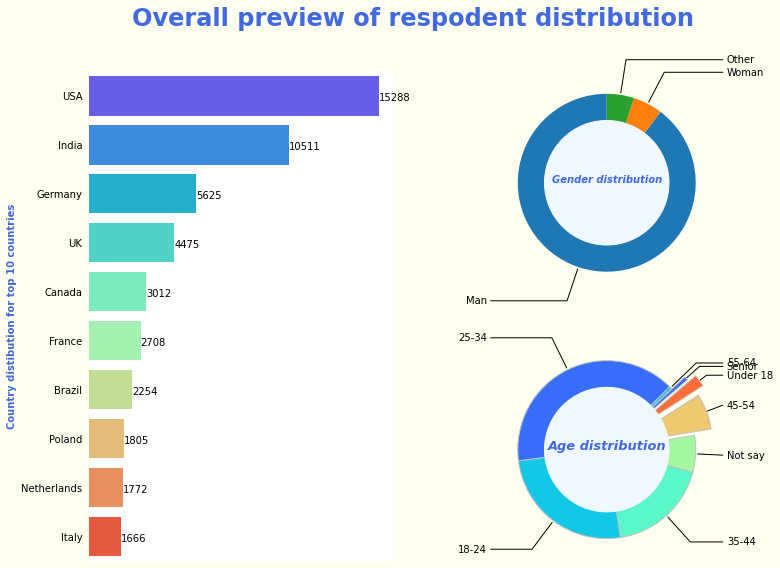

In [11]:
country = df['Country'].value_counts().sort_values(ascending = False)[:10].to_frame().reset_index().rename(columns = {'index': 'Country', 'Country': 'Count'})
country.Country.replace('United Kingdom of Great Britain and Northern Ireland', 'UK', inplace =True)
country.Country.replace('United States of America', 'USA', inplace =True)

age = df.Age.value_counts().sort_values(ascending = False).to_frame().reset_index().rename(columns = {'Age':'Count', 'index':'Age'})
fig1 = plt.figure(figsize = (12,9), constrained_layout = False)
colors = 'rainbow'

gsp = GridSpec(2,2, figure =fig1)

fig1.subplots_adjust(top=0.88)
fig1.suptitle('Overall preview of respodent distribution',
             color = 'royalblue',
             fontweight = 'bold',
             fontsize = 24,
             ha = 'center') 

ax1 = fig1.add_subplot(gsp[:,0])
ax2  =fig1.add_subplot(gsp[0,1])
ax3 = fig1.add_subplot(gsp[1,1])
#axis1
sns.barplot(x = country.Count, y = country.Country, ax = ax1, palette = colors)
sns.despine()
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width() , p.get_y() +0.5 , f"{int(p.get_width())}")
    
ax1.set_xlabel('')
ax1.set_ylabel('Country distibution for top 10 countries', 
               color = 'royalblue',
              fontweight='bold')
ax1.tick_params(axis="y", left=False)
ax1.tick_params(axis="x", bottom=False)
ax1.set_xlabel('')
ax1.set_xticklabels([])

for spine in ax1.spines.values():
    spine.set_visible(False)

    
    
#axis2
ax2.axis('off')
labels = ['Man','Woman', 'Other']
colors = sns.color_palette('rainbow')

wedges, texts = ax2.pie(df.Gender.value_counts().values,  wedgeprops=dict(width=0.5),startangle = 90)

kw = dict(arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax2.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)


center_circle = plt.Circle((0, 0), radius = 0.7, color='aliceblue')
ax2.add_artist(center_circle)

ax2.text(0,0,
         'Gender distribution',
        ha = 'center', 
        fontsize = 10,
        style = 'italic',
        color = 'royalblue',
        fontweight='bold')

#axis3
ax3.axis('off') 

label = [l for l in df.Age.unique()]
colors = sns.color_palette('rainbow')

wedge, text = ax3.pie(age.Count,colors = colors,wedgeprops = {'edgecolor':'silver'},startangle = 45, explode = [0,0,0,0,0.2,0.3,0.2,0])

for i, p in enumerate(wedge):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax3.annotate(label[i], xy=(x, y ) , xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

center_circle2 = plt.Circle((0, 0), radius = 0.7, color='aliceblue')
ax3.add_artist(center_circle2)
ax3.text(0,0,
         'Age distribution',
        ha = 'center', 
        fontsize = 13,
        style = 'italic',
        color = 'royalblue',
        fontweight='bold')


fig1.set_facecolor('ivory')

In [12]:
# pd.options.display.max_colwidth = 700
df = df_main[["MainBranch", "Gender", "Age", "Country","EdLevel","DevType","LearnCode","Employment","LanguageHaveWorkedWith",
         "MiscTechHaveWorkedWith","DatabaseHaveWorkedWith","CompTotal"]]                

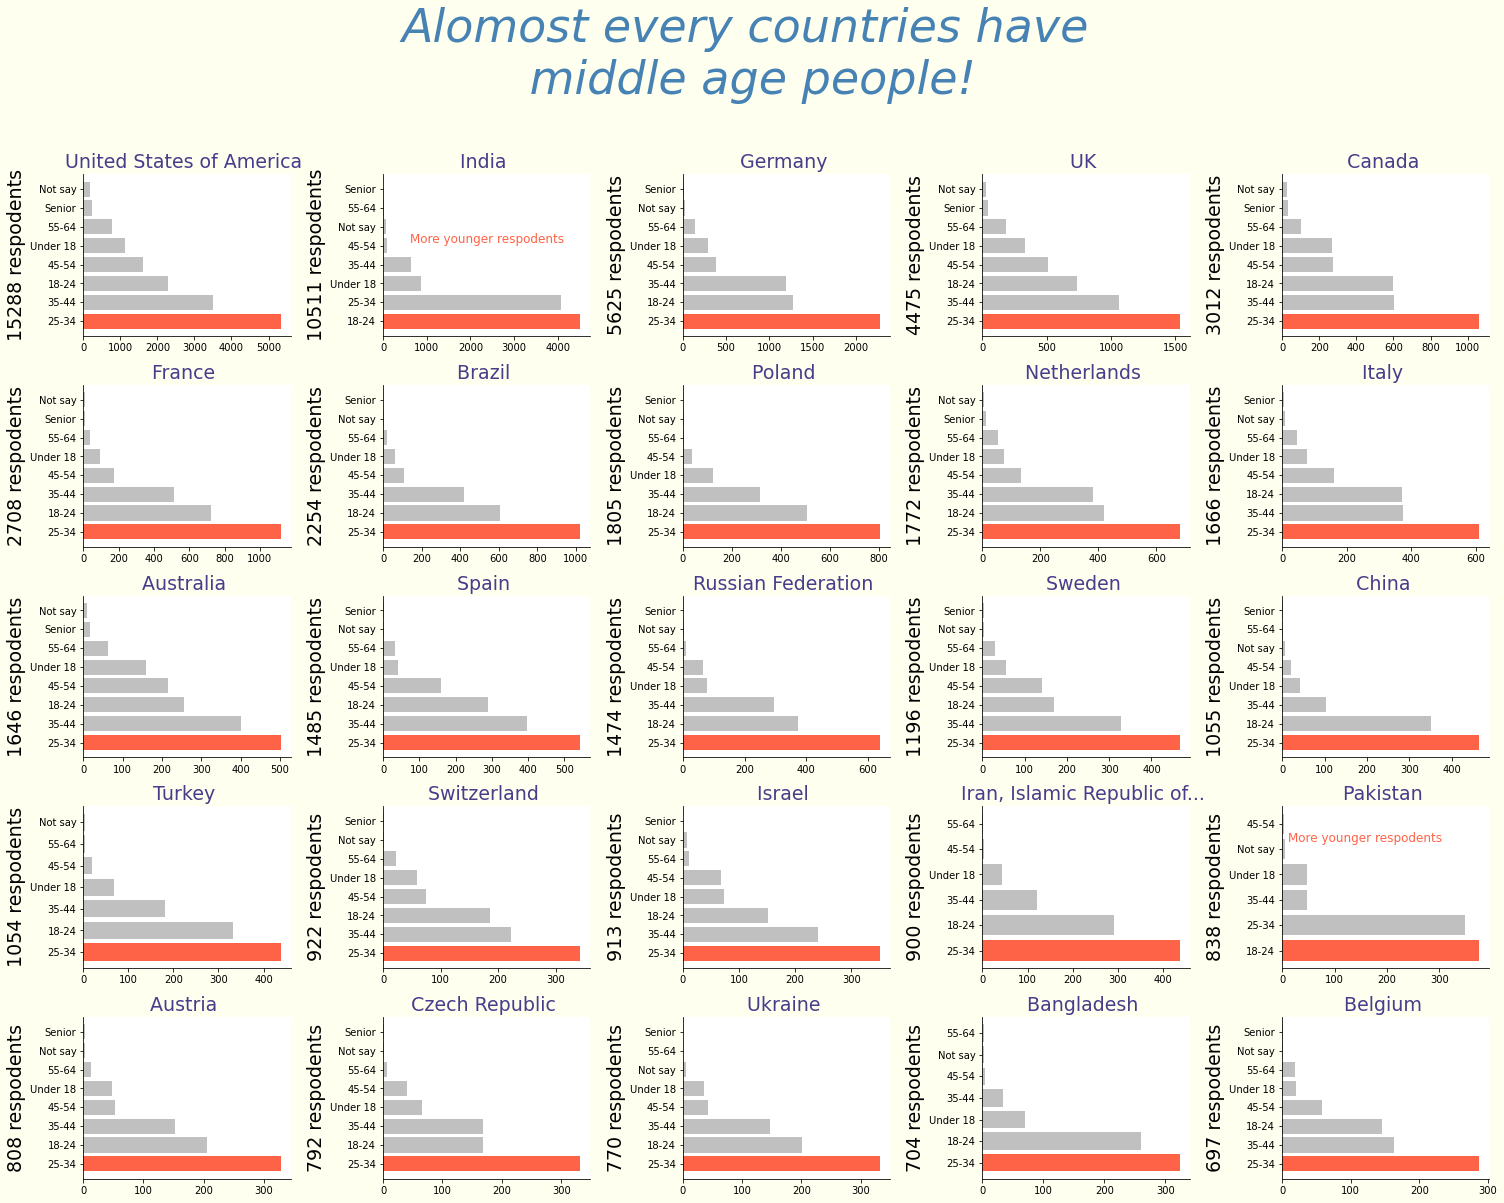

In [13]:
a = df.groupby(['Country'])
country = df.Country.value_counts().sort_values(ascending = False).to_frame().reset_index().rename(columns = {'index': 'Country', 'Country': 'Count'})[:25]

#colors = ['dodgerblue', 'orange', 'green','silver', 'tomato', 'crimson', 'gold', 'lightseagreen']
rs = ['tomato' if a == '25-34'  else 'silver' for a in df.Age.unique() ]

fig, axs = plt.subplots(5,5, figsize=(21, 17), facecolor='w', edgecolor='k',sharex = False, sharey = False)
fig.subplots_adjust(hspace = .7, wspace=0.8)

fig.subplots_adjust(top=0.88)
fig.suptitle("Alomost every countries have \n middle age people! \n ", fontsize=46, style = 'italic', color = 'steelblue')


axs = axs.ravel()

for c,i in zip(country.Country,range(25)):
    axs[i].barh(a.get_group(c)['Age'].value_counts().index,   a.get_group(c)['Age'].value_counts().values, color = rs)
    axs[i].set_title(f"{ c if c != 'United Kingdom of Great Britain and Northern Ireland'  else 'UK'} ", fontsize = 19, color = 'darkslateblue')
    axs[i].set_ylabel(f"{df[df['Country'] == c]['Country'].count()} respodents", fontsize = 19)
    

    
    
axs[1].text(0.5, 0.6, 'More younger respodents' , 
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=axs[1].transAxes,
           fontsize=12, color='tomato')

axs[19].text(0.4, 0.8, 'More younger respodents', 
            horizontalalignment='center', 
            verticalalignment='center', 
            transform=axs[19].transAxes,
           fontsize=12, color='tomato')


sns.despine()
fig.set_facecolor('ivory')
fig.tight_layout()


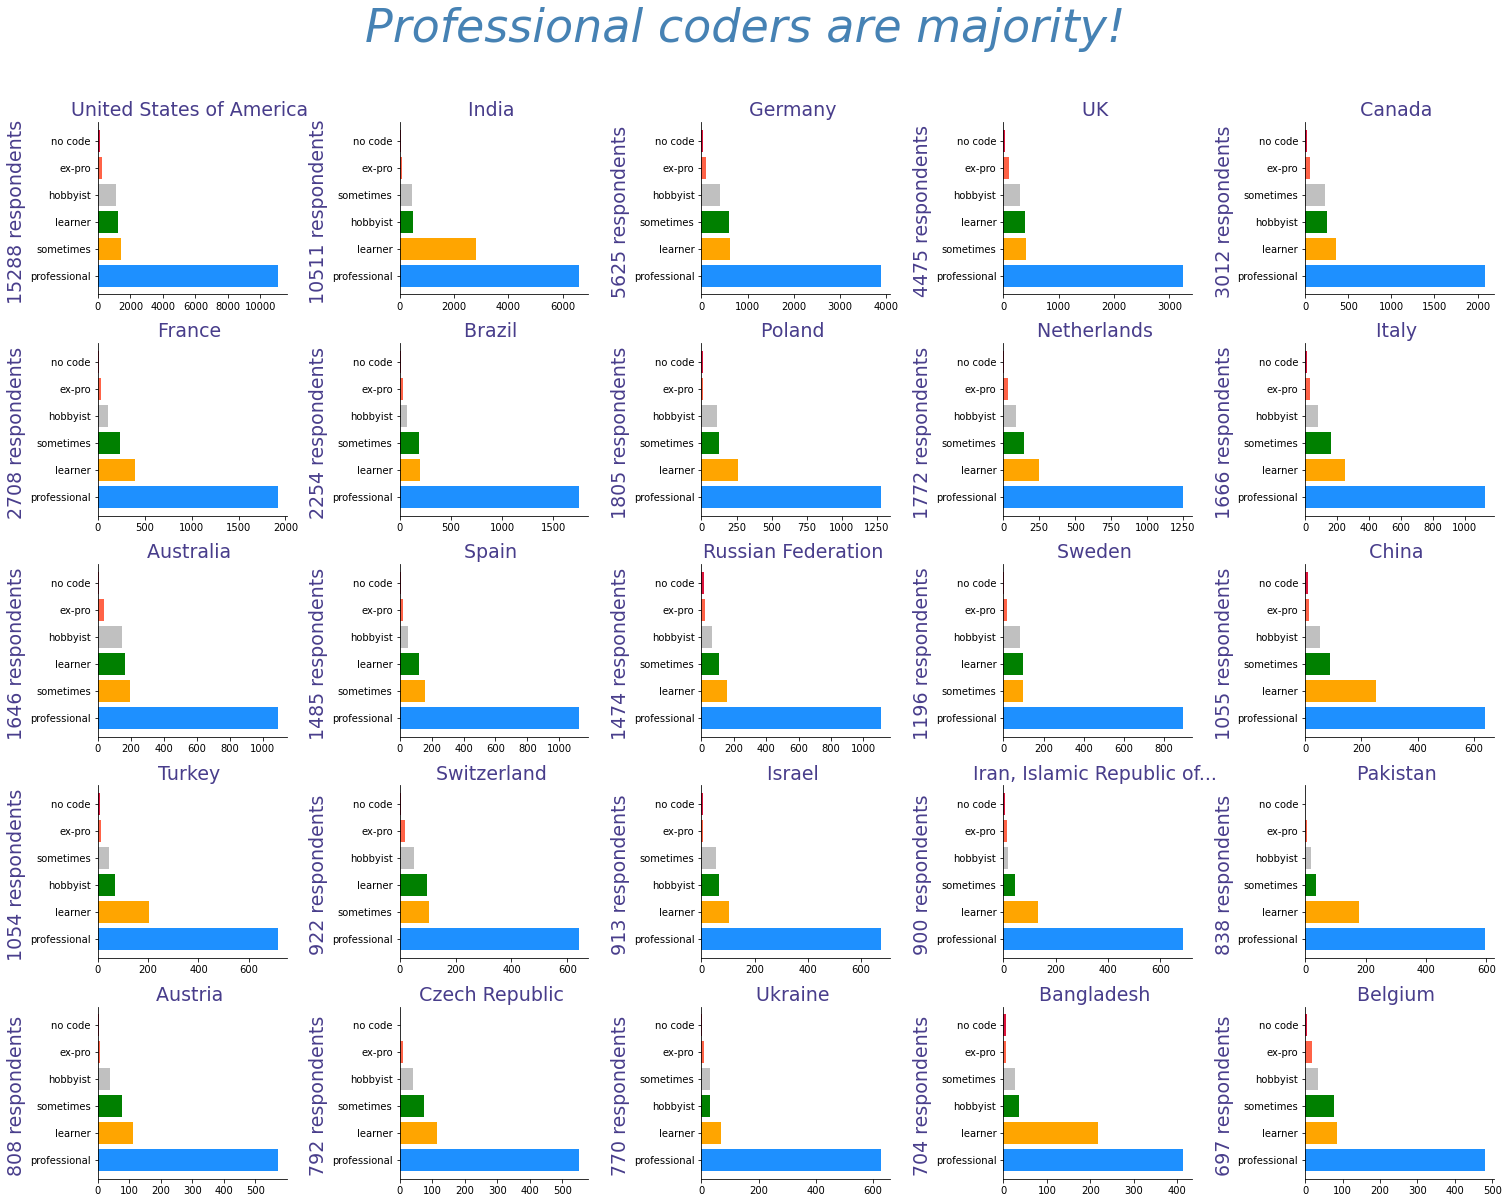

In [14]:
a = df.groupby(['Country'])
country = df.Country.value_counts().sort_values(ascending = False).to_frame().reset_index().rename(columns = {'index': 'Country', 'Country': 'Count'})[:25]
  
colors = ['dodgerblue', 'orange', 'green','silver', 'tomato', 'crimson', 'gold', 'lightseagreen']
#rs = ['tomato' if a == '25-34 years old'  else 'silver' for a in df.Age.unique() ]

fig, axs = plt.subplots(5,5, figsize=(21, 17), facecolor='w', edgecolor='k',sharex = False, sharey = False)
fig.subplots_adjust(hspace = .7, wspace=0.8)

fig.subplots_adjust(top=0.88)
fig.suptitle("Professional coders are majority! \n ", fontsize=46, style = 'italic', color = 'steelblue')

axs = axs.ravel()

for c,i in zip(country.Country,range(25)):
    axs[i].barh(a.get_group(c)['MainBranch'].value_counts().index,   a.get_group(c)['MainBranch'].value_counts().values, color = colors)
    axs[i].set_title(f"{ c if c != 'United Kingdom of Great Britain and Northern Ireland'  else 'UK'} ", fontsize = 19, color = 'darkslateblue')
    axs[i].set_ylabel(f"{df[df['Country'] == c]['MainBranch'].count()} respondents ", fontsize = 19, color = 'darkslateblue')
    

sns.despine()
fig.tight_layout()


In [15]:
df[['MainBranch', 'Age']].sample(11)

,MainBranch,Age
46755,hobbyist,Under 18
13550,professional,35-44
37710,professional,25-34
17899,professional,35-44
58363,professional,18-24
55297,sometimes,45-54
81190,professional,35-44
14209,professional,25-34
23635,learner,18-24
24376,learner,Under 18


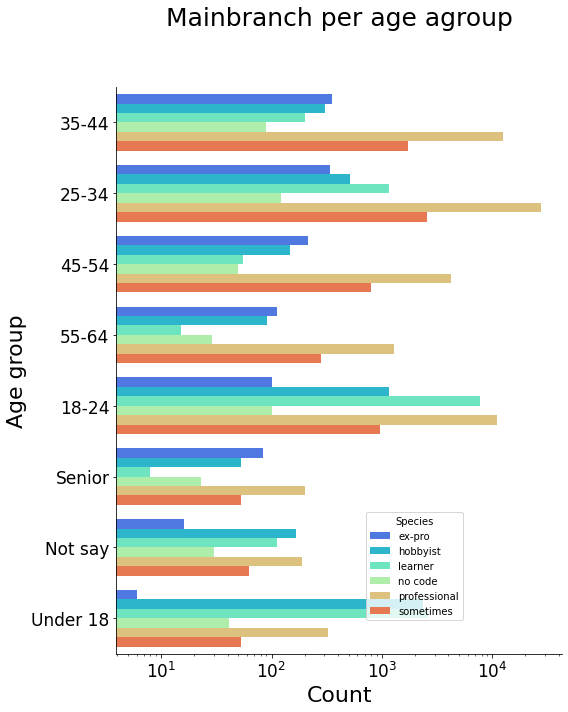

In [16]:
plot = df.groupby(['MainBranch'])['Age'].value_counts().to_frame().rename(columns = {'Age' : 'Count'}).reset_index()

plot['MainBranch'] = plot['MainBranch'].replace({'I am a developer by profession' : 'professional',
                                                          'I am a student who is learning to code' : 'learner',
                                                          'I am not primarily a developer, but I write code sometimes as part of my work' : 'sometimes',
                                                          'I code primarily as a hobby' : 'hobbyist',
                                                          'I used to be a developer by profession, but no longer am' : 'ex-pro',
                                                          'None of these' : 'no code'})


fig = plt.figure(figsize = (8, 10))



ax = sns.barplot(data = plot, y = plot.Age, x = plot.Count, ci = None, hue = 'MainBranch', palette  ='rainbow')

sns.move_legend(ax, "lower left", bbox_to_anchor=(.55, .05), title='Species')

plt.xticks(fontsize  = (17))
plt.yticks(fontsize  = (17))

ax.set_title('Mainbranch per age agroup\n\n', fontsize  = 25)
ax.set_xlabel('Count', fontsize  = 22)
ax.set_ylabel('Age group', fontsize  = 22)
ax.set_xscale('log')

fig.tight_layout()
sns.despine()

C:\Users\TCL\AppData\Local\Temp/ipykernel_6584/2756845495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = np.where(


(0.0, 1.0, 0.0, 1.0)

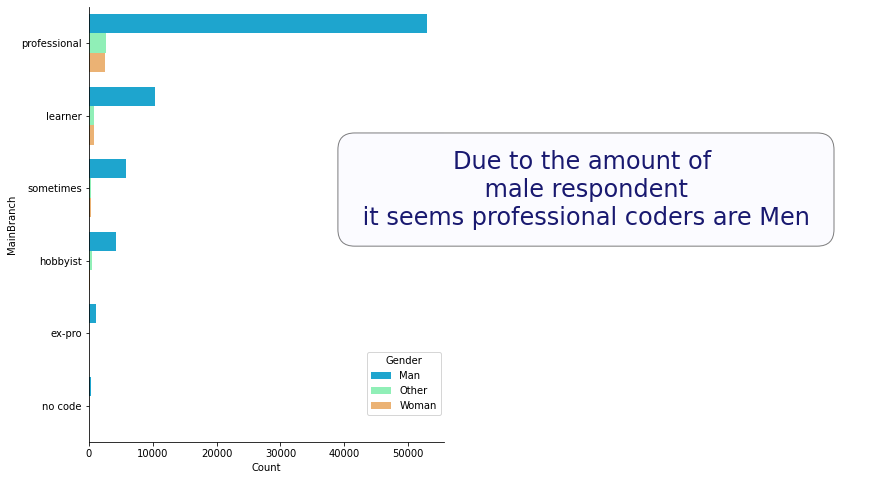

In [17]:
df['Gender'] = np.where(
     (df['Gender'] == 'Man') | (df['Gender'] == 'Woman'), 
      df['Gender'], 'Other' )

g_m = df.groupby('Gender')['MainBranch'].value_counts().to_frame().rename(columns = {'MainBranch': 'Count'}).reset_index()

g_m['MainBranch'] = g_m['MainBranch'].replace({'I am a developer by profession' : 'professional',
                                                          'I am a student who is learning to code' : 'learner',
                                                          'I am not primarily a developer, but I write code sometimes as part of my work' : 'sometimes',
                                                          'I code primarily as a hobby' : 'hobbyist',
                                                          'I used to be a developer by profession, but no longer am' : 'ex-pro',
                                                          'None of these' : 'no code'})

fig = plt.figure(figsize = (14, 8))
                 
gsp = GridSpec(1, 2, figure = fig)

ax1 = fig.add_subplot(gsp[0,0])
sns.barplot(data = g_m, y ='MainBranch', x = 'Count', hue = 'Gender', ax = ax1, palette = 'rainbow')
sns.move_legend(ax1, "lower left", bbox_to_anchor=(.77, .05), title='Gender')

sns.despine()

ax2 = fig.add_subplot(gsp[0,1])

ax2.text(0.2,0.5,'Due to the amount of \n male respondent \n it seems professional coders are Men '
         ,fontsize = 24,
         bbox=dict(facecolor='ghostwhite', alpha=0.5, pad=10, boxstyle='round, pad=.7'),
        ha = 'center', 
        color = 'midnightblue');

ax2.axis('off')

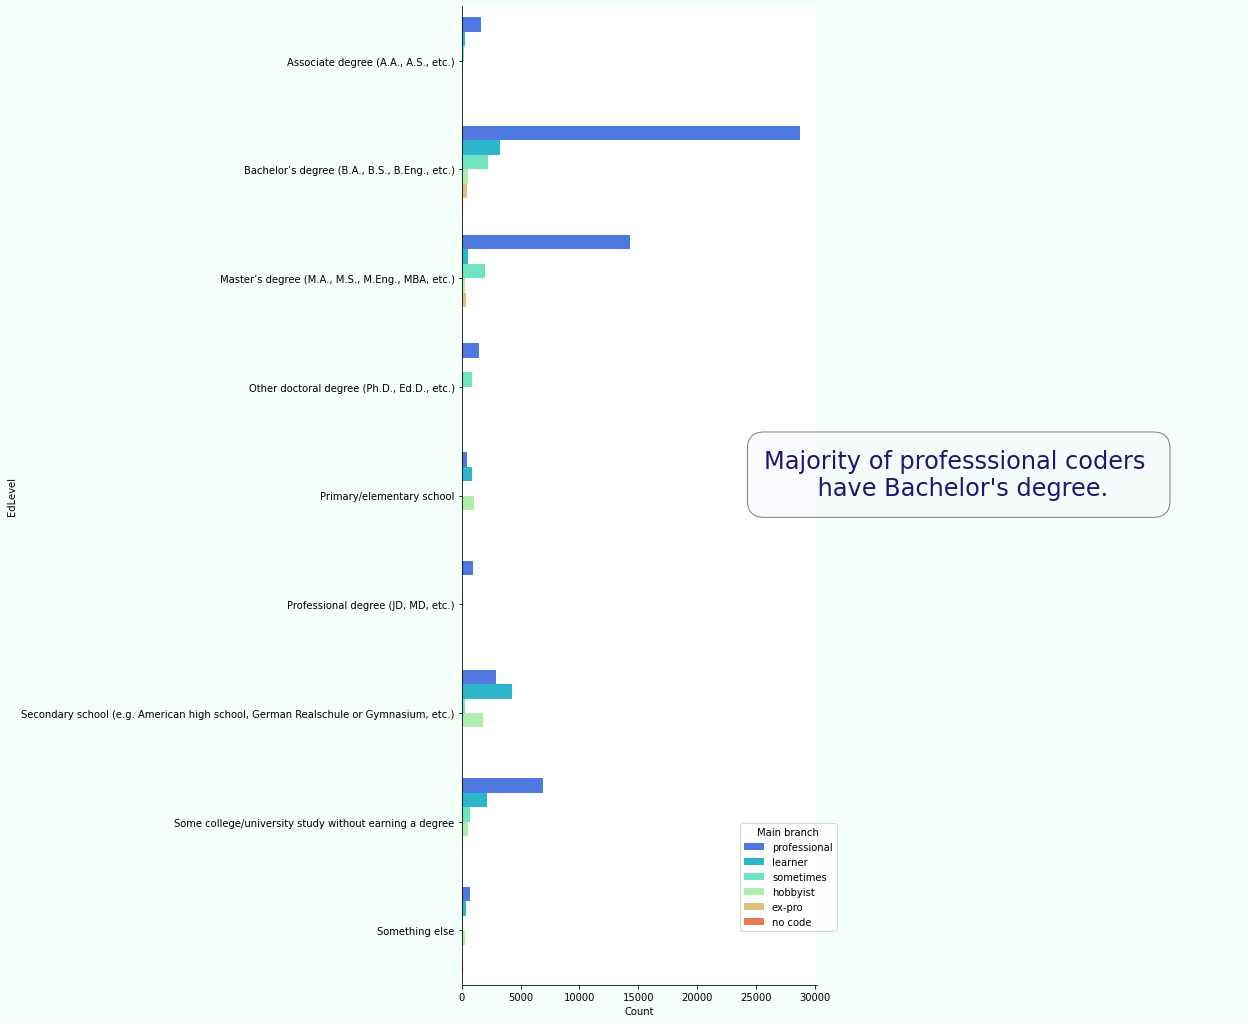

In [18]:
e_m = df.groupby('EdLevel')['MainBranch'].value_counts().to_frame().rename(columns = {'MainBranch':'Count'}).reset_index()

fig2 = plt.figure(figsize = (14, 18))
                 
gsp = GridSpec(1, 2, figure = fig2)

ax1 = fig2.add_subplot(gsp[0,0])
sns.barplot(data = e_m, y ='EdLevel', x = 'Count', hue = 'MainBranch', ax = ax1, palette = 'rainbow')

sns.move_legend(ax1, "lower left", bbox_to_anchor=(.77, .05), title='Main branch')

sns.despine()

ax2 = fig2.add_subplot(gsp[0,1])

ax2.text(0.2,0.5,"Majority of professsional coders \n have Bachelor's degree.",
         fontsize = 24,
         bbox=dict(facecolor='ghostwhite', alpha=0.5, pad=10, boxstyle='round, pad=.7'), 
        ha = 'center', 
        color='midnightblue')
ax2.axis('off')
fig2.set_facecolor('mintcream')

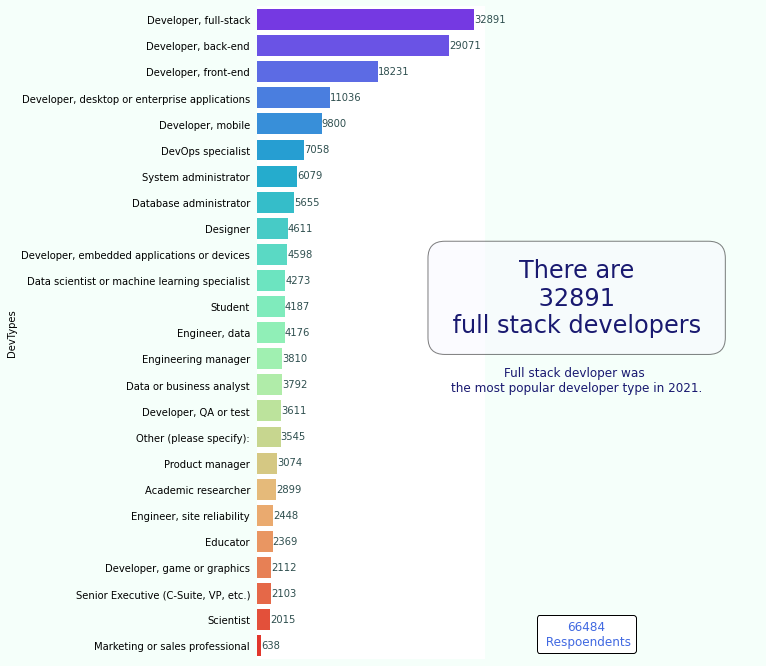

In [19]:
dt = df.DevType.str.split(';', expand= True).stack().value_counts().to_frame().reset_index().rename(columns = {0:'Count', 'index':'DevTypes'})

fig3 = plt.figure(figsize = (9, 12))
gs = GridSpec(1, 2, figure = fig3)

ax1 = fig3.add_subplot(gs[0,0])
ax2 = fig3.add_subplot(gs[0,1])


sns.barplot(data =dt, y = 'DevTypes', x = 'Count', palette = 'rainbow', ax= ax1)

for  i,p in zip(dt.Count,ax1.patches):
    ax1.text(p.get_x() + p.get_width(),
             p.get_y()+.5,
             str(i), color = 'darkslategrey' )

sns.despine()
ax1.tick_params(axis="y", left=False)
ax1.tick_params(axis="x", bottom=False)
ax1.set_xlabel('')
ax1.set_xticklabels([])

for spine in ax1.spines.values():
    spine.set_visible(False)

ax2.axis('off')

ax2.text(0.2,0.5,f"There are\n {dt.Count[0]} \n full stack developers ",
         fontsize = 24,
         bbox=dict(facecolor='ghostwhite', alpha=0.5, pad=10, boxstyle='round, pad=.7'), 
        ha = 'center', 
        color='midnightblue')

ax2.text(0.2,0.41,"Full stack devloper was \nthe most popular developer type in 2021.",
         fontsize = 12, 
        ha = 'center', 
        color='midnightblue');

at2 = AnchoredText(f"{df.DevType.count()}\n Respoendents",loc='lower left',
                   prop=dict(size=12,horizontalalignment = 'center', color = 'royalblue'),borderpad=0.5)

at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax2.add_artist(at2)

fig3.set_facecolor('mintcream')


In [20]:
dev = [d for d in df.DevType.str.split(';', expand = True).stack().dropna().value_counts().index]

In [21]:
df.loc[df.DevType.str.contains('Senior Executive (C-Suite, VP, etc.)', na =False), 'MainBranch'].value_counts()

C:\Users\TCL\AppData\Local\Temp/ipykernel_6584/3917565097.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df.DevType.str.contains('Senior Executive (C-Suite, VP, etc.)', na =False), 'MainBranch'].value_counts()


Series([], Name: MainBranch, dtype: int64)

In [22]:
df.loc[df.DevType.str.contains('Other (please specify):', na =False), 'MainBranch'].value_counts()

C:\Users\TCL\AppData\Local\Temp/ipykernel_6584/2585593149.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df.loc[df.DevType.str.contains('Other (please specify):', na =False), 'MainBranch'].value_counts()


Series([], Name: MainBranch, dtype: int64)

C:\Users\TCL\AppData\Local\Temp/ipykernel_6584/3604909534.py:18: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  flt = df.DevType.str.contains(str(d), na = False)


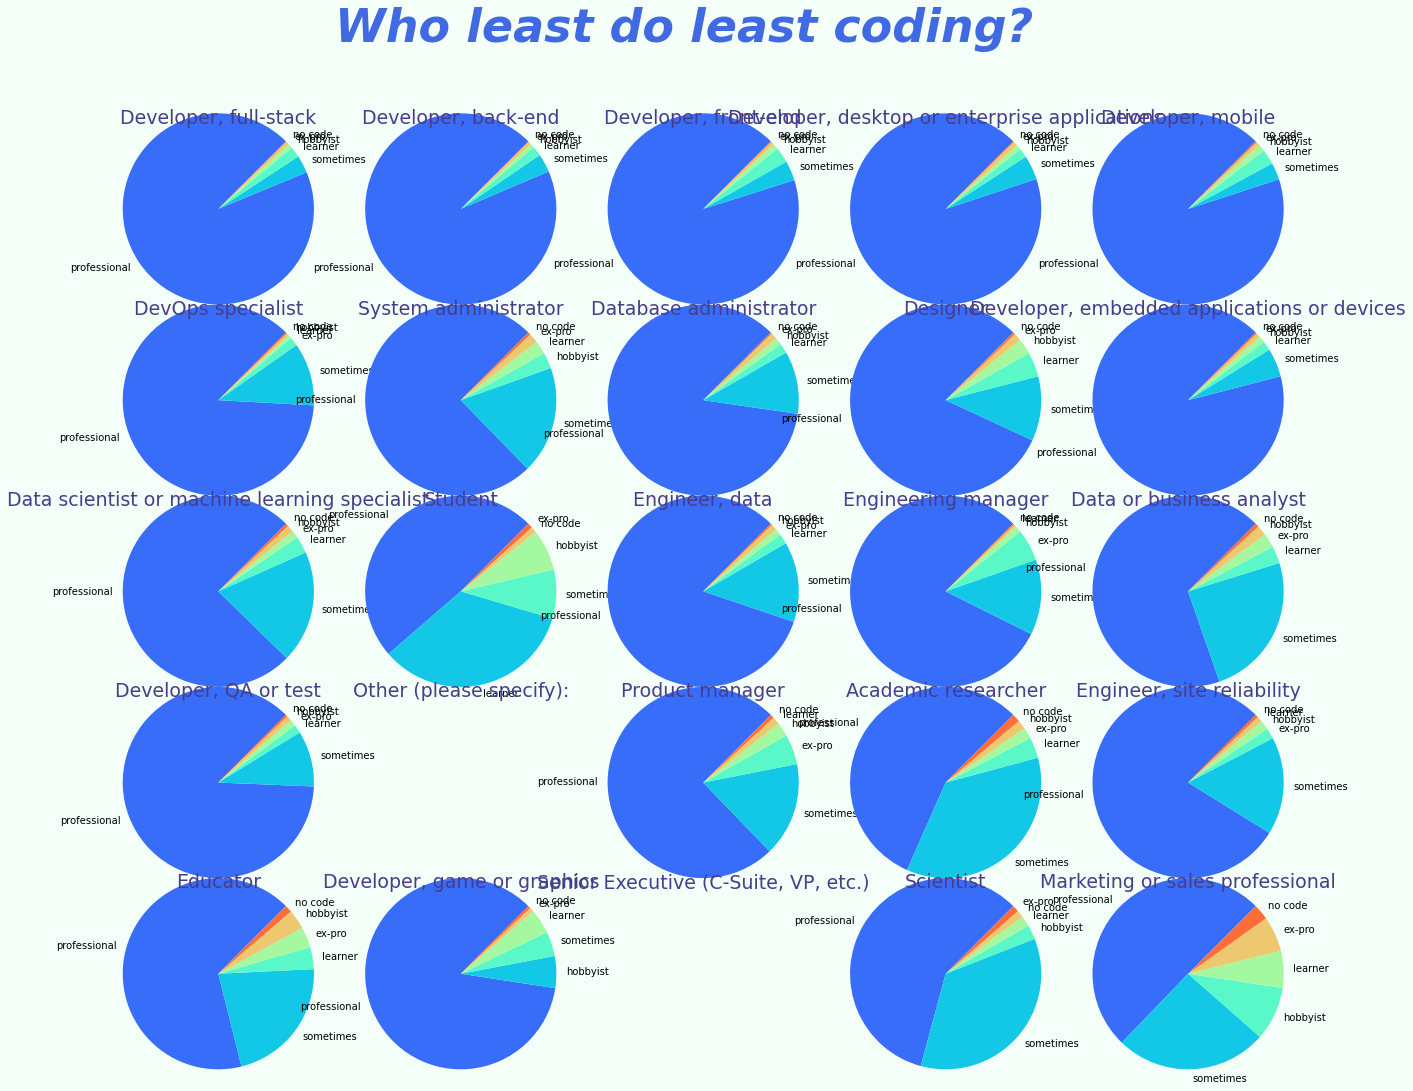

In [23]:
#colors = ['dodgerblue', 'orange', 'green','silver', 'tomato', 'crimson', 'gold', 'lightseagreen']
#rs = ['tomato' if a == '25-34 years old'  else 'silver' for a in df.Age.unique() ]
colors = sns.color_palette('rainbow')

fig, axes = plt.subplots(5,5, figsize=(21, 17), facecolor='mintcream',
                         edgecolor='k')

fig.subplots_adjust(top=0.88)
fig.suptitle("Who least do least coding?",
             fontsize=46,
             style = 'italic',
             color = 'royalblue',
            fontweight = 'bold')

axs = axes.ravel()

for i,d in zip(range(len(df.DevType.str.split(';', expand = True).stack().dropna().value_counts())),df.DevType.str.split(';', expand = True).stack().dropna().value_counts().index):
    flt = df.DevType.str.contains(str(d), na = False)
    pie = df.loc[flt, 'MainBranch'].value_counts().dropna()
    axs[i].pie(pie.values, labels = pie.index, radius = 1.5,startangle= 45,colors = colors)
    axs[i].set_title(d,fontsize = 19, color = 'darkslateblue')


sns.despine()

In [53]:
sns.color_palette('rainbow', n_colors  = 4)

[(0.09999999999999998, 0.5877852522924731, 0.9510565162951535),
 (0.30000000000000004, 0.9510565162951535, 0.8090169943749475),
 (0.7, 0.9510565162951536, 0.5877852522924731),
 (1.0, 0.5877852522924732, 0.30901699437494745)]

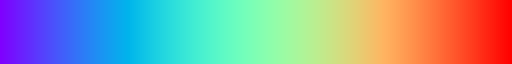

In [70]:
plt.colormaps['rainbow']

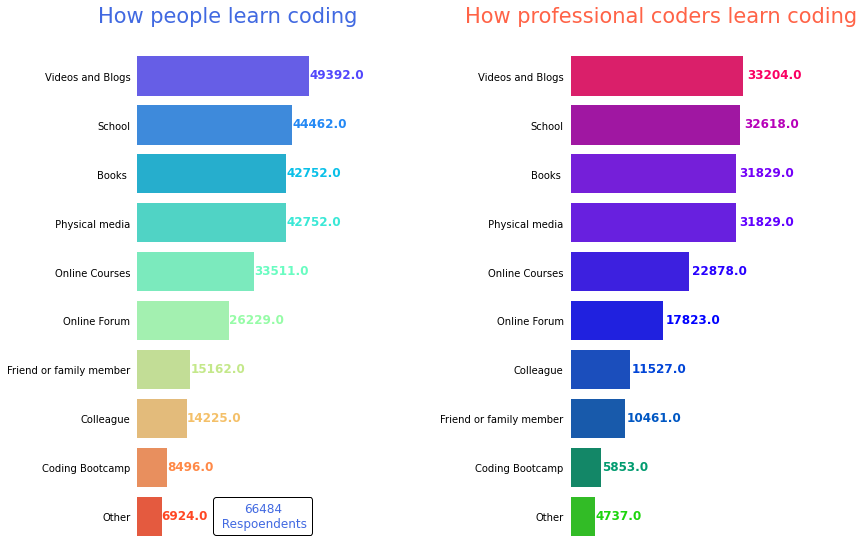

In [24]:
learn_code = df.LearnCode.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index' :'Sources',0: 'Count'}).replace({'Other online resources (ex: videos, blogs, etc)':'Videos and Blogs',
'Other (please specify):': 'Other',
'Online Courses or Certification':'Online Courses'})

temp = df.groupby(['MainBranch']).get_group('professional')['LearnCode'].to_frame().reset_index(drop = True).rename(columns = {'LearnCode' :'Sources'})         
pro_learn_code = temp.Sources.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 0:'Count'}).replace({'Other online resources (ex: videos, blogs, etc)' : 'Videos and Blogs' ,'Other (please specify):': 'Other',
'Online Courses or Certification':'Online Courses'})   


fig = plt.figure(figsize =(11,9), constrained_layout = False)

gsp = GridSpec(3,3, figure= fig)

ax1 = fig.add_subplot(gsp[:,0])
ax2 = fig.add_subplot(gsp[:,2])


#axis1

sns.barplot(data = learn_code, y = learn_code.Sources, x = learn_code.Count, ax = ax1, palette = 'rainbow')
ax1.set_title('How people learn coding\n', fontsize = 21,color = 'royalblue')
ax1.tick_params(axis="y", left=False)
ax1.tick_params(axis="x", bottom=False)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels([])

for spine in ax1.spines.values():
    spine.set_visible(False)
    
for p,c in zip(ax1.patches, sns.color_palette('rainbow', n_colors = len(learn_code))):
    ax1.text(p.get_x() + p.get_width(), p.get_y() + 0.45, f"{p.get_width()}", color = c, fontweight = 'bold', fontsize = 12)
    
#axis2
sns.barplot(data = pro_learn_code, y = pro_learn_code.Sources, x =pro_learn_code.Count, ax = ax2, palette = 'prism')
ax2.set_title('How professional coders learn coding\n', fontsize = 21,color = 'tomato')
ax2.tick_params(axis="y", left=False)
ax2.tick_params(axis="x", bottom=False)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels([])
for spine in ax2.spines.values():
    spine.set_visible(False)
    
for p,c in zip(ax2.patches, sns.color_palette('prism',n_colors = len(pro_learn_code))):
    ax2.text(p.get_x() + p.get_width() + p.get_width() /40, p.get_y() + 0.45, f"{p.get_width()}", color = c, fontweight = 'bold', fontsize = 12)
    
at2 = AnchoredText(f"{df.DevType.count()}\n Respoendents",loc='lower right',
                   prop=dict(size=12,horizontalalignment = 'center', color = 'royalblue'),borderpad=0.5)

at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax1.add_artist(at2)



In [25]:
learn_code_1824 = df.groupby('Age').get_group('18-24')['LearnCode'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 'LearnCode' : 'Count'}).Sources.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 0 : 'Count'})
learn_code_2534 = df.groupby('Age').get_group('25-34')['LearnCode'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 'LearnCode' : 'Count'}).Sources.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 0 : 'Count'})
learn_code_3544 = df.groupby('Age').get_group('35-44')['LearnCode'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 'LearnCode' : 'Count'}).Sources.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 0 : 'Count'})
learn_code_4554= df.groupby('Age').get_group('45-54')['LearnCode'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 'LearnCode' : 'Count'}).Sources.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 0 : 'Count'})
learn_code_u18 = df.groupby('Age').get_group('Under 18')['LearnCode'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 'LearnCode' : 'Count'}).Sources.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 0 : 'Count'})
learn_code_5564 = df.groupby('Age').get_group('55-64')['LearnCode'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 'LearnCode' : 'Count'}).Sources.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 0 : 'Count'})
learn_code_ns = df.groupby('Age').get_group('Not say')['LearnCode'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 'LearnCode' : 'Count'}).Sources.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 0 : 'Count'})
learn_code_se = df.groupby('Age').get_group('Senior')['LearnCode'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 'LearnCode' : 'Count'}).Sources.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index': 'Sources', 0 : 'Count'})

learn_code_1824['AgeGroup'] = ['18-24'] * len(learn_code_1824)
col = learn_code_1824.columns.to_list()
col.insert(0, col.pop())
learn_code_1824 = learn_code_1824[col]

learn_code_2534['AgeGroup'] = ['25-34'] * len(learn_code_2534)
col = learn_code_2534.columns.to_list()
col.insert(0, col.pop())
learn_code_2534 = learn_code_2534[col]

learn_code_3544['AgeGroup'] = ['35-44'] * len(learn_code_3544)
col = learn_code_3544.columns.to_list()
col.insert(0, col.pop())
learn_code_3544 = learn_code_3544[col]

learn_code_u18['AgeGroup'] = ['U-18'] * len(learn_code_u18)
col = learn_code_u18.columns.to_list()
col.insert(0, col.pop())
learn_code_u18 = learn_code_u18[col]

learn_code_5564['AgeGroup'] = ['55-64'] * len(learn_code_5564)
col = learn_code_5564.columns.to_list()
col.insert(0, col.pop())
learn_code_5564 = learn_code_5564[col]

learn_code_se['AgeGroup'] = ['senior'] * len(learn_code_se)
col = learn_code_se.columns.to_list()
col.insert(0, col.pop())
learn_code_se = learn_code_se[col]

learn_code_ns['AgeGroup'] = ['not say'] * len(learn_code_ns)
col = learn_code_ns.columns.to_list()
col.insert(0, col.pop())
learn_code_ns = learn_code_ns[col]

learn_code_4554['AgeGroup'] = ['45-54'] * len(learn_code_4554)
col = learn_code_4554.columns.to_list()
col.insert(0, col.pop())
learn_code_4554 = learn_code_4554[col]

dfs = [learn_code_1824, learn_code_2534, learn_code_3544, learn_code_u18,
      learn_code_5564, learn_code_se, learn_code_ns, learn_code_4554 ]

age_learn_code = pd.concat(dfs)


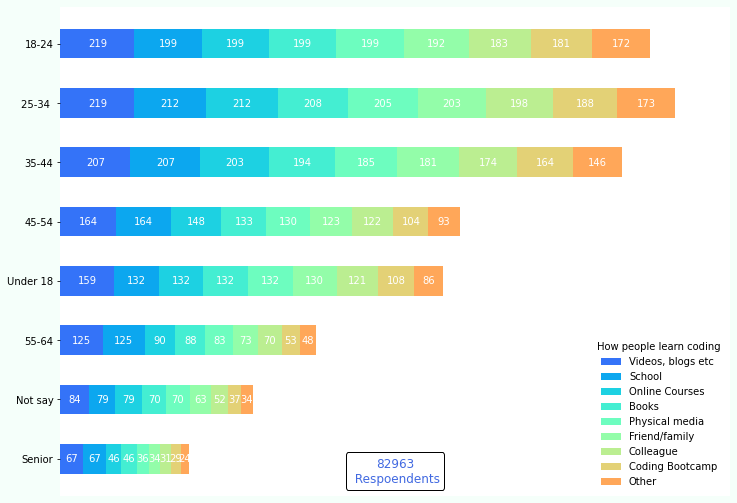

In [26]:
category_names = ['Videos, blogs etc', 
                  'School',
                  'Online Courses',
                  'Books',
                  'Physical media',
                 'Friend/family',
                 'Colleague',
                 'Coding Bootcamp',
                'Other' ]
        
results = {
    '18-24': [219, 199, 199, 199, 199, 192, 183, 181, 172,143],
    '25-34 ': [219, 212, 212, 208, 205, 203, 198, 188, 173, 161],
    '35-44': [207, 207, 203, 194, 185, 181, 174, 164, 146, 141],
    '45-54': [164, 164, 148, 133, 130, 123, 122, 104, 93, 77],
    'Under 18': [159, 132, 132, 132, 132, 130, 121, 108, 86, 64],
    '55-64': [125, 125, 90, 88, 83, 73, 70, 53, 48, 41],
    'Not say': [84, 79, 79, 70, 70, 63, 52, 37, 34, 31],
    'Senior': [67, 67, 46, 46, 36, 34, 31, 29, 24, 15]
}



def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['rainbow'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=1,
              loc='lower right', fontsize= 'medium', shadow = True, framealpha = 1, frameon = False, title = 'How people learn coding')
    sns.despine()
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    at2 = AnchoredText(f"{df.LearnCode.count()}\n Respoendents",loc='lower center',
                       prop=dict(size=12,horizontalalignment = 'center', color = 'royalblue'),borderpad=0.5)
    at2.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at2)
    fig.set_facecolor('mintcream')
    

    return fig, ax


survey(results, category_names)
plt.show()


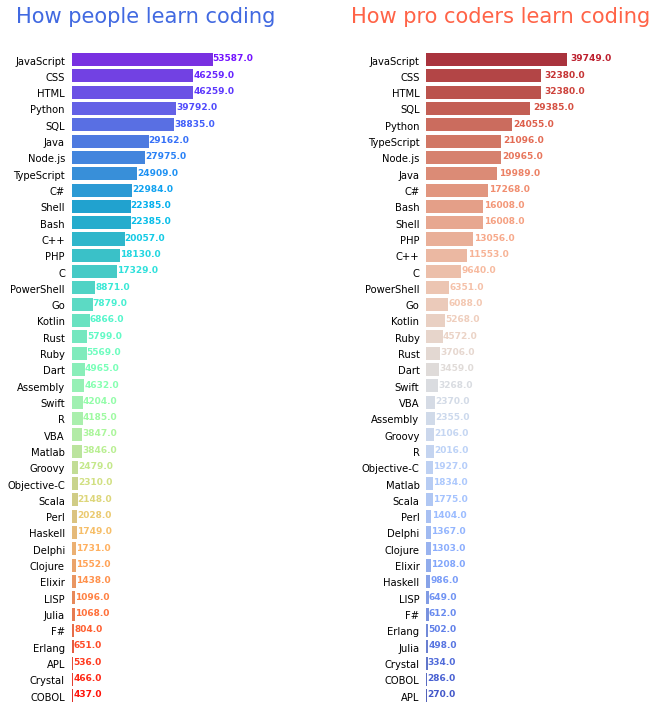

In [27]:
lang_work = df.LanguageHaveWorkedWith.str.split('/|;', expand = True).unstack().value_counts().to_frame().reset_index().rename(columns = {'index':'Lang', 0:'Count'})

temp = df.groupby(['MainBranch']).get_group('professional')['LanguageHaveWorkedWith'].to_frame().reset_index(drop = True)
pro_lang = temp.LanguageHaveWorkedWith.str.split('/|;', expand = True).stack().value_counts().to_frame().reset_index().rename(columns = {'index':'Lang', 0:'Count'})

fig = plt.figure(figsize =(9,12), constrained_layout = False)

gsp = GridSpec(3,3, figure= fig)

ax1 = fig.add_subplot(gsp[:,0])
ax2 = fig.add_subplot(gsp[:,2])


#axis1

sns.barplot(data = lang_work, y = lang_work.Lang, x = lang_work.Count, ax = ax1, palette = 'rainbow')
ax1.set_title('How people learn coding\n', fontsize = 21,color = 'royalblue')
ax1.tick_params(axis="y", left=False)
ax1.tick_params(axis="x", bottom=False)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels([])

for spine in ax1.spines.values():
    spine.set_visible(False)
    
for p,c in zip(ax1.patches, sns.color_palette('rainbow', n_colors = len(lang_work))):
    ax1.text(p.get_x() + p.get_width(), p.get_y() + 0.45, f"{p.get_width()}", color = c, fontweight = 'bold', fontsize = 9)
    
#axis2
sns.barplot(data = pro_lang, y = pro_lang.Lang, x =pro_lang.Count, ax = ax2, palette = 'coolwarm_r')
ax2.set_title('How pro coders learn coding\n', fontsize = 21,color = 'tomato')
ax2.tick_params(axis="y", left=False)
ax2.tick_params(axis="x", bottom=False)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels([])
for spine in ax2.spines.values():
    spine.set_visible(False)
    
for p,c in zip(ax2.patches, sns.color_palette('coolwarm_r',n_colors = len(pro_lang))):
    ax2.text(p.get_x() + p.get_width() + p.get_width() /40, p.get_y() + 0.45, f"{p.get_width()}", color = c, fontweight = 'bold', fontsize = 9)


In [28]:
have_worked = df_main.LanguageHaveWorkedWith.str.split('/|;', expand = True).unstack().value_counts().to_frame().reset_index().rename(columns = {'index':'Lang', 0:'Count'})
want_work = df_main.LanguageWantToWorkWith.str.split('/|;', expand = True).unstack().value_counts().to_frame().reset_index().rename(columns = {'index':'Lang', 0:'Count'})
comb = pd.merge(have_worked, want_work, on = 'Lang').rename(columns = {'Count_x' :'HaveWorked',
                                                                      'Count_y'  : 'WantWork'})

comb

,Lang,HaveWorked,WantWork
0,JavaScript,53587,37008
1,CSS,46259,29353
2,HTML,46259,29353
3,Python,39792,34929
4,SQL,38835,26631
5,Java,29162,17222
6,Node.js,27975,24100
7,TypeScript,24909,26905
8,C#,22984,17999
9,Shell,22385,14043


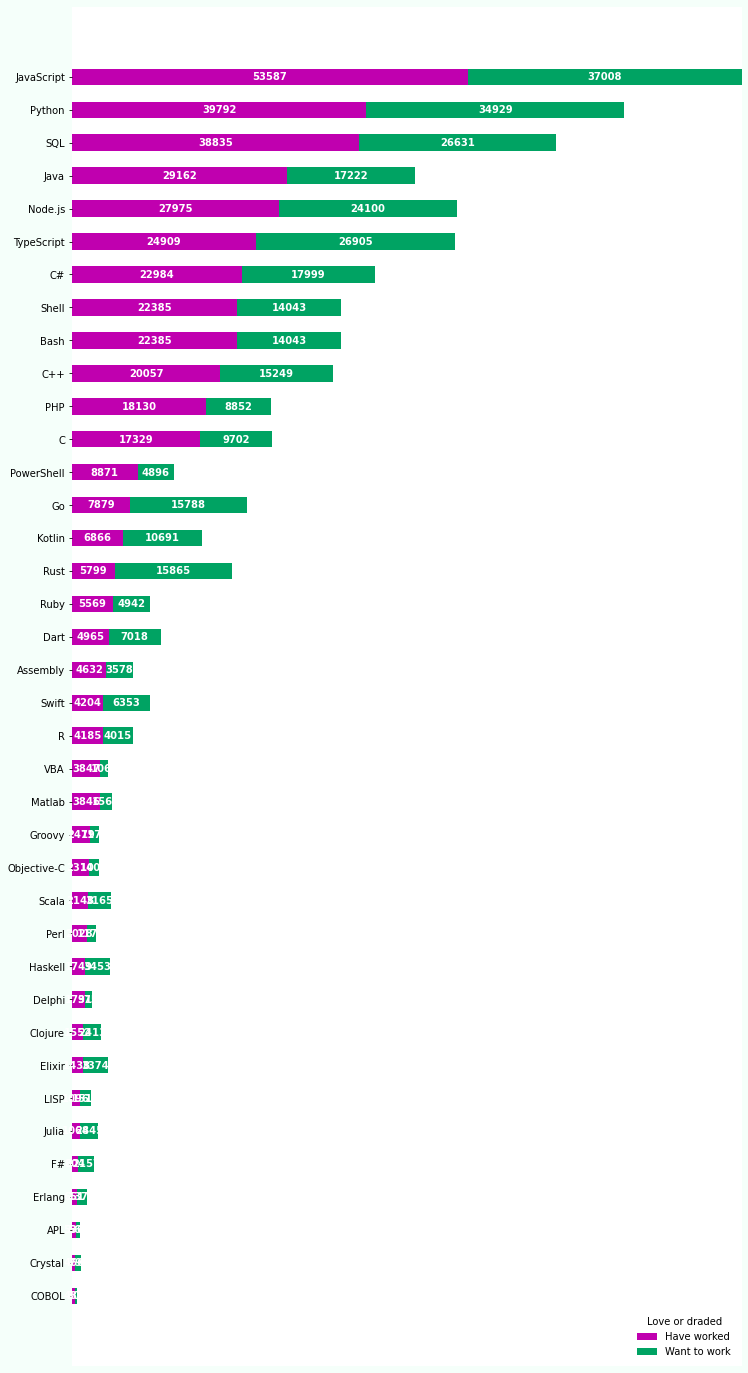

In [29]:
figr = plt.figure(figsize = (12,25))
gsp = GridSpec(2,2, figure = fig)

ax3 = figr.add_subplot(gsp[:,:])

category_names = ['Have worked ','Want to work']

results = dict()
for l, h, w in zip(comb.Lang, comb.HaveWorked, comb.WantWork):
    if l != 'HTML':
        if l != 'CSS':
            results[l] = [h, w]


labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps['prism_r'](np.linspace(0.15, 0.85, data.shape[1]))

ax3.invert_yaxis()
ax3.xaxis.set_visible(False)
ax3.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax3.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax3.bar_label(rects, label_type='center', color=text_color, fontweight = 'bold')
    ax3.legend(ncol=1,
               loc='lower right', fontsize= 'medium', shadow = True, framealpha = 1, frameon = False, title = 'Love or draded')
    
    for spine in ax3.spines.values():
        spine.set_visible(False)
    
figr.set_facecolor('mintcream')

(-0.5, 0.5)

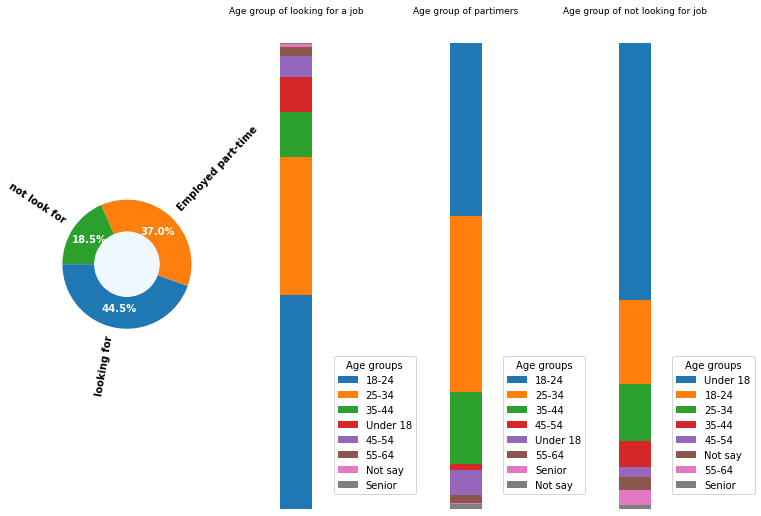

In [30]:
emp = df.Employment.value_counts()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 9))
fig.subplots_adjust(wspace=0.05)

ratios = emp.values[[3,4,6]]
labels = emp.index[[3,4,6]]

angle = -180 * ratios[1]
_,_, autotext = ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,labels=labels,rotatelabels = True,  pctdistance=0.7, textprops = {'fontweight' :'bold'})
for at in autotext:
    at.set_color('w')
center_circle = plt.Circle((0, 0), radius = 0.5, color='aliceblue')
ax1.add_artist(center_circle)


xpos = 0
bottom = 0
ratios = df.groupby('Employment').get_group('looking for')['Age'].value_counts().to_frame().reset_index().rename(columns = {'index':'AgeGroup', 'Age':'Count'}).Count
width = .2

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom)
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    
ax2.set_title('Age group of looking for a job', fontsize = 9)
ax2.legend((df.groupby('Employment').get_group('looking for')['Age'].value_counts().to_frame().reset_index().rename(columns = {'index':'AgeGroup', 'Age':'Count'}).AgeGroup), loc = 'lower right')
sns.move_legend(ax2, "lower left", bbox_to_anchor=(.7, .02), title='Age groups')

ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# axis3
xpos2 = 0
bottom2 = 0
ratios2 = df.groupby('Employment').get_group('Employed part-time')['Age'].value_counts().to_frame().reset_index().rename(columns = {'index':'AgeGroup', 'Age':'Count'}).Count
width2 = .2

for j in range(len(ratios)):
    height = ratios2[j]
    ax3.bar(xpos2, height, width2, bottom=bottom2)
    ypos = bottom + ax3.patches[j].get_height() / 2
    bottom += height
    
ax3.set_title('Age group of partimers', fontsize = 9)
ax3.legend((df.groupby('Employment').get_group('Employed part-time')['Age'].value_counts().to_frame().reset_index().rename(columns = {'index':'AgeGroup', 'Age':'Count'}).AgeGroup),
          )

sns.move_legend(ax3, "lower left", bbox_to_anchor=(.7, .02), title='Age groups')

ax3.axis('off')
ax3.set_xlim(- 2.5 * width, 2.5 * width)

#axis4

xpos3 = 0
bottom3 = 0
ratios3 = df.groupby('Employment').get_group('not look for')['Age'].value_counts().to_frame().reset_index().rename(columns = {'index':'AgeGroup', 'Age':'Count'}).Count
width3 = .2

for j in range(len(ratios)):
    height = ratios3[j]
    ax4.bar(xpos3, height, width3, bottom=bottom3)
    ypos = bottom + ax4.patches[j].get_height() / 2
    bottom += height
    
ax4.set_title('Age group of not looking for job', fontsize = 9)
ax4.legend((df.groupby('Employment').get_group('not look for')['Age'].value_counts().to_frame().reset_index().rename(columns = {'index':'AgeGroup', 'Age':'Count'}).AgeGroup),
          )

sns.move_legend(ax4, "lower left", bbox_to_anchor=(.7, .02), title='Age groups')

ax4.axis('off')
ax4.set_xlim(- 2.5 * width, 2.5 * width)


# Employment by coutry

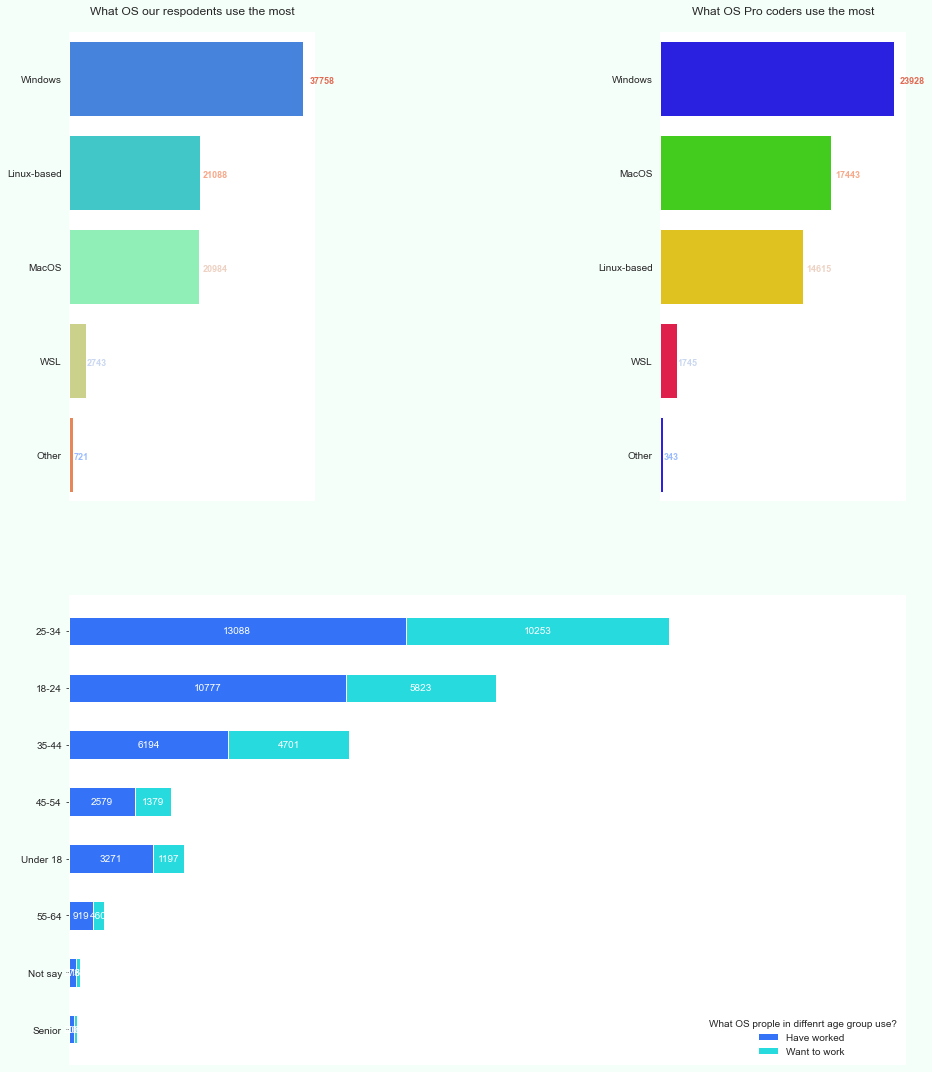

In [42]:
figr  = plt.figure(figsize = (15,19))

gsp = GridSpec(2,3, figure = figr)

#axis1
ax1 = figr.add_subplot(gsp[0,0])

sns.barplot(x = df.OpSys.value_counts().values, y=  df.OpSys.value_counts().index, ax= ax1, palette = 'rainbow')

ax1.set_title('What OS our respodents use the most\n')
ax1.set_xticklabels([])

for spine in ax1.spines.values():
    spine.set_visible(False)
    
ax1.tick_params(axis = 'x', bottom = False)
ax1.tick_params(axis = 'y', left = False)

for p,c in zip(ax1.patches, sns.color_palette('coolwarm_r',n_colors = 6)):
    ax1.text(p.get_x() + p.get_width() + p.get_width() /40, p.get_y() + 0.45, f"{int(p.get_width())}", color = c, fontweight = 'bold', fontsize = 9)

#axis2

temp = df.groupby(['MainBranch']).get_group('professional')['OpSys'].to_frame().reset_index(drop = True)
pro_os = temp.OpSys.value_counts()

ax2 = figr.add_subplot(gsp[0,2])
sns.barplot(x = pro_os.values, y=  pro_os.index, ax= ax2, palette = 'prism')
ax2.set_title('What OS Pro coders use the most\n')
ax2.set_xticklabels([])

for spine in ax2.spines.values():
    spine.set_visible(False)

ax2.tick_params(axis = 'x', bottom = False)
ax2.tick_params(axis = 'y', left = False)

for p,c in zip(ax2.patches, sns.color_palette('coolwarm_r',n_colors = 6)):
    ax2.text(p.get_x() + p.get_width() + p.get_width() /40, p.get_y() + 0.45, f"{int(p.get_width())}", color = c, fontweight = 'bold', fontsize = 9)

#ax3
ax3 = figr.add_subplot(gsp[1,:])

agp = df.Age.value_counts().index

results = dict()
for a in agp:
    results[a] = df.groupby(['Age'], as_index = True).get_group(a)['OpSys'].value_counts().to_list()

labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps['rainbow'](np.linspace(0.15, 0.85, data.shape[1]))

ax3.invert_yaxis()
ax3.xaxis.set_visible(False)
ax3.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax3.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax3.bar_label(rects, label_type='center', color=text_color)
    ax3.legend(ncol=1,
               loc='lower right', fontsize= 'medium', shadow = True, framealpha = 1, frameon = False, title = 'What OS prople in diffenrt age group use?')
    
    for spine in ax3.spines.values():
        spine.set_visible(False)
    
figr.set_facecolor('mintcream')

In [34]:
dev_sal_usd = df[(df['Currency'] == 'USD\tUnited States dollar') & (df['CompFreq'] == 'Yearly')]
dev_sal_usd = dev_sal_usd[['DevType','Country', 'CompTotal', 'Currency', 'CompFreq', 'YearsCodePro']]

d = dev_sal_usd['DevType'].str.split(';|/', expand = True).stack().to_frame().rename(columns = {0:'Dev'})
s = dev_sal_usd['CompTotal'].to_frame()

dev_sal = d.join(s.reindex(d.index, level = 0))

dev_sal_median = dict()
devs = [ind for ind in dev_sal.Dev.value_counts().index if ind != 'Other (please specify):']

for dv in devs:
    dev_sal_median[dv] = dev_sal.groupby('Dev').get_group(dv)['CompTotal'].median()

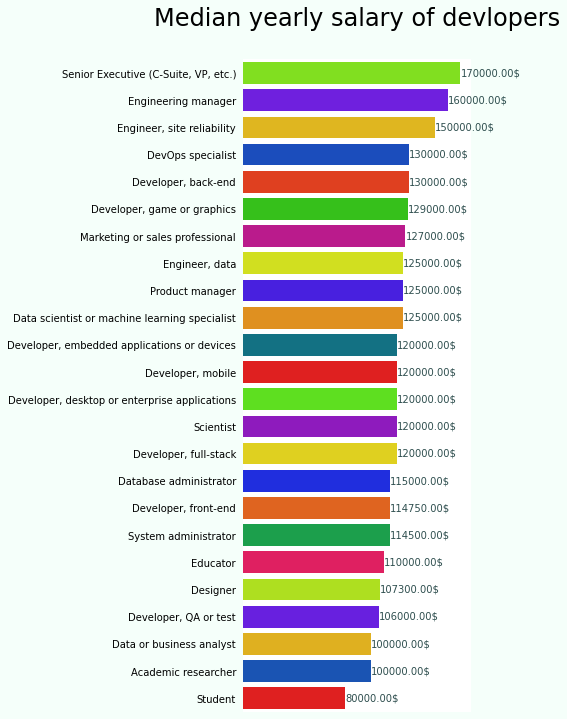

In [35]:
dev_sal_median = pd.Series(dev_sal_median)
dev_sal_median = dev_sal_median.sort_values(ascending = False)

fig = plt.figure(figsize = (9, 12))
gs = GridSpec(1, 2, figure = fig)

ax1 = fig.add_subplot(gs[:,0])

sns.barplot(y = dev_sal_median.index, x = dev_sal_median.values, palette = 'prism', ax= ax1)

for  i,p in zip(dev_sal_median.values,ax1.patches):
    ax1.text(p.get_x() + p.get_width(),
             p.get_y()+.5,
             "{:.2f}".format(i) + '$', color = 'darkslategrey' )


sns.despine()
ax1.tick_params(axis="y", left=False)
ax1.tick_params(axis="x", bottom=False)
ax1.set_xlabel('')
ax1.set_xticklabels([])

for spine in ax1.spines.values():
    spine.set_visible(False)

ax1.set_title('Median yearly salary of devlopers\n', fontsize = 24)

fig.set_facecolor('mintcream')

In [36]:
dev_sal_usd = df[(df['Currency'] == 'USD\tUnited States dollar') & (df['CompFreq'] == 'Yearly')]
dev_sal_usd = dev_sal_usd[['DevType','Country', 'CompTotal', 'Currency', 'CompFreq', 'YearsCodePro']]

d = dev_sal_usd['DevType'].str.split(';|/', expand = True).stack().to_frame().rename(columns = {0:'Dev'})
ce = dev_sal_usd[['CompTotal', 'YearsCodePro']]

dev_e_sal = d.join(ce.reindex(d.index, level = 0))

In [37]:
dev_e_sal['YearsCodePro'] = dev_e_sal.YearsCodePro.astype(float)
data = dev_e_sal[['Dev', 'CompTotal', 'YearsCodePro']].groupby('Dev').agg({'CompTotal' : 'median', 'YearsCodePro' : 'mean'})

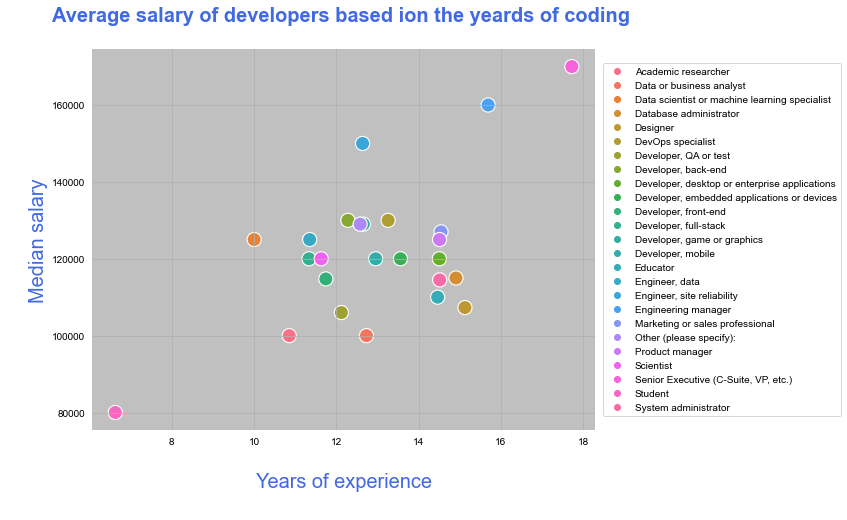

In [38]:
dev_e_sal['YearsCodePro'] = dev_e_sal['YearsCodePro'].astype(float)

data = dev_e_sal[['Dev', 'CompTotal', 'YearsCodePro']].groupby('Dev').agg({'CompTotal': 'median', 'YearsCodePro':'mean'}).reset_index()

fig =plt.figure(figsize = (9, 7))

gs = GridSpec(1,2, figure = fig)

ax1 = fig.add_subplot(gs[0,:])

ax1 = sns.scatterplot(data= data, y= 'CompTotal', x = 'YearsCodePro', hue = 'Dev', s = 200)
ax1.legend(loc = 'right', bbox_to_anchor = (1.5, 0.5), ncol = 1)
sns.set_style('ticks')

for sp in ax1.spines.values():
    sp.set_visible(False)
    
ax1.tick_params(axis = 'x', bottom = False)
ax1.tick_params(axis = 'y', left = False)
ax1.set_ylabel('\nMedian salary', fontsize = 20, color = 'royalblue')
ax1.set_xlabel('\nYears of experience\n', fontsize = 20,color = 'royalblue')
ax1.set_facecolor('silver')
ax1.grid(fillstyle = 'bottom')
ax1.set_title('Average salary of developers based ion the yeards of coding \n', fontsize = 20, color ='royalblue', fontweight = 'bold');


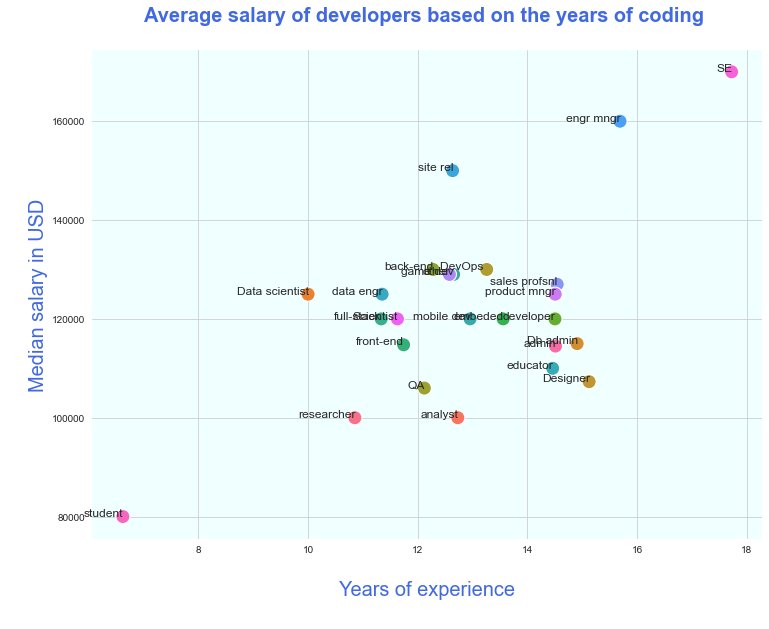

In [39]:
dev_e_sal.YearsCodePro.astype(float)
data = dev_e_sal[['Dev', 'CompTotal', 'YearsCodePro']].groupby('Dev').agg({'CompTotal': 'median', 'YearsCodePro':'mean'}).reset_index()

fig =plt.figure(figsize = (12, 9))

gs = GridSpec(1,2, figure = fig)

ax1 = fig.add_subplot(gs[0,:])

ax1 = sns.scatterplot(data= data, y= 'CompTotal', x = 'YearsCodePro', hue = 'Dev', s = 200, legend = None)

sns.set_style('ticks')

for sp in ax1.spines.values():
    sp.set_visible(False)
    
ax1.tick_params(axis = 'x', bottom = False)
ax1.tick_params(axis = 'y', left = False)
ax1.set_ylabel('\nMedian salary in USD', fontsize = 20, color = 'royalblue')
ax1.set_xlabel('\nYears of experience\n', fontsize = 20,color = 'royalblue')


ax1.set_title('Average salary of developers based on the years of coding \n', fontsize = 20, color ='royalblue', fontweight = 'bold');

devs = ['researcher', 'analyst', 'Data scientist', 'Db admin', 'Designer', 'DevOps ', 'QA', 'back-end', 'developer', 'embeded', 'front-end', 'full-stack',
       'game dev', 'mobile dev', 'educator', 'data engr', 'site rel', 'engr mngr', 'sales profsnl', 'other', 'product mngr', 'Scientist',
       'SE', 'student', 'admin']

for line in range(data.shape[0]):
    ax1.text(data.YearsCodePro[line] + 0.01, data.CompTotal[line], devs[line], size = 'large', ha = 'right')
ax1.set_facecolor('azure')
ax1.grid(fillstyle = 'bottom');


<h1>
    <div class="alert alert-info" role="info">
a brief EDA only data scientists
</div>
</h1>

In [40]:
flt1 = df_main.DevType.str.contains('Data scientist or machine learning specialist', na = False)
ds = df_main.loc[flt1, ['MainBranch', "Age", "Country","EdLevel","DevType","LearnCode", "YearsCode","YearsCodePro","Employment","LanguageHaveWorkedWith",
         "MiscTechHaveWorkedWith","DatabaseHaveWorkedWith","OpSys","CompTotal", "Currency"]]

flt2 = df_main.DevType.str.contains('data', na= False)
de = df_main.loc[flt2, ['MainBranch', "Age", "Country","EdLevel","DevType","LearnCode", "YearsCode","YearsCodePro","Employment","LanguageHaveWorkedWith",
         "MiscTechHaveWorkedWith","DatabaseHaveWorkedWith","OpSys","CompTotal", "Currency"]]

ds_df = ds.append(de)

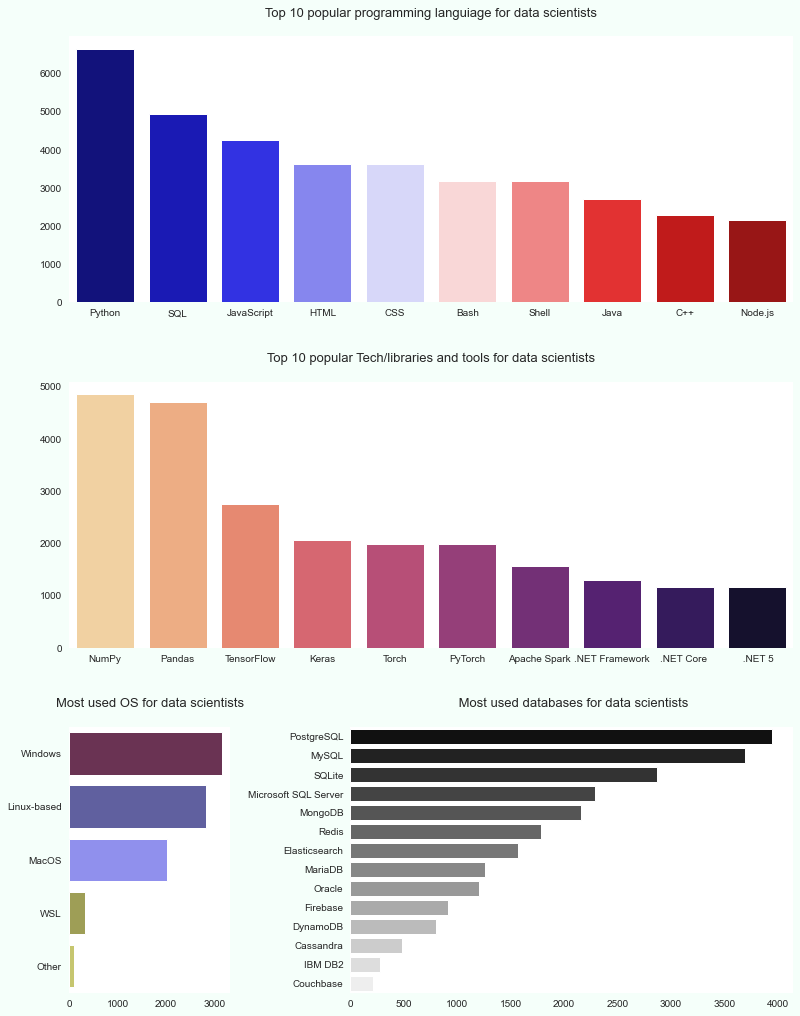

In [41]:
ds_lang = ds_df.LanguageHaveWorkedWith.str.split(';|/', expand = True).stack().value_counts()
ds_mt = ds_df['MiscTechHaveWorkedWith'].str.split(';|/', expand = True).stack().value_counts()
ds_os = ds_df.OpSys.value_counts()
ds_dbw =ds_df.DatabaseHaveWorkedWith.str.split(';|/', expand = True).stack().value_counts()

fig = plt.figure(figsize = (11, 14), constrained_layout = True)
gs = GridSpec(3,3, figure = fig)

ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])
ax3 = fig.add_subplot(gs[2,0])
ax4 = fig.add_subplot(gs[2,1:])



#axis1 
sns.barplot(y = ds_lang.values[:10], x = ds_lang.index[:10], ax = ax1, palette = 'seismic')

ax1.tick_params(axis="y", left=False)
ax1.tick_params(axis="x", bottom=False)

for spine in ax1.spines.values():
    spine.set_visible(False)

ax1.set_title('Top 10 popular programming languiage for data scientists\n', fontsize = 13)

#axis2

sns.barplot(y = ds_mt.values[:10], x = ds_mt.index[:10], ax = ax2, palette = 'magma_r')

ax2.tick_params(axis="y", left=False)
ax2.tick_params(axis="x", bottom=False)

for spine2 in ax2.spines.values():
    spine2.set_visible(False)

ax2.set_title('\n\nTop 10 popular Tech/libraries and tools for data scientists\n', fontsize = 13)

#axis3

sns.barplot(x = ds_os.values, y = ds_os.index, ax = ax3, palette = 'gist_stern')

ax3.tick_params(axis="y", left=False)
ax3.tick_params(axis="x", bottom=False)

for spine3 in ax3.spines.values():
    spine3.set_visible(False)

ax3.set_title('\n\nMost used OS for data scientists\n', fontsize = 13)

#axis4

sns.barplot(x = ds_dbw.values, y = ds_dbw.index, ax = ax4, palette = 'gist_yarg_r')

ax4.tick_params(axis="y", left=False)
ax4.tick_params(axis="x", bottom=False)

for spine4 in ax4.spines.values():
    spine4.set_visible(False)

ax4.set_title('\n Most used databases for data scientists\n', fontsize = 13)
fig.set_facecolor('mintcream');